In [1]:
from fromFatiando import *
from fromSimPEG import *
from scipy.constants import mu_0
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
from Mag import *
%matplotlib inline

In [3]:
monFile = "./data2015/TAData2015_Wednesday.csv"
data = pd.DataFrame(pd.read_csv(monFile, header = 0)) 

In [6]:
data

,Team,Time,Location (m),Total Field #1 (nT),Total Field #2 (nT),Total Field #3 (nT),Total Field #4 (nT),Total Field #5 (nT),Total Field #6 (nT),Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Corrected Total Field Data (nT),Standard Deviation (nT),Location (m),Anomaly
0,0,2:10,Base,566,562,560,562,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,562.500000,2.179449,NaN,32.500000
1,0,NaN,5,542,540,538,540,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,540.000000,1.414214,5.00,10.000000
2,0,NaN,7,536,535,537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,536.000000,0.816497,7.00,6.000000
3,0,NaN,9,535,532,533,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,533.333333,1.247219,9.00,3.333333
4,0,NaN,11,532,524,531,530,532,531,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,530.000000,2.768875,11.00,0.000000
5,0,NaN,13,534,534,533,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,533.666667,0.471405,13.00,3.666667
6,0,NaN,15,547,550,550,550,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,549.250000,1.299038,15.00,19.250000
7,0,NaN,14,539,541,540,538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,539.500000,1.118034,14.00,9.500000
8,0,NaN,16,570,568,571,576,575,571,574,...,NaN,NaN,NaN,NaN,NaN,NaN,572.142857,2.695423,16.00,42.142857
9,0,NaN,16.5,590,591,597,591,594,599,592,...,NaN,NaN,NaN,NaN,NaN,NaN,595.545455,4.961005,16.50,65.545455


In [4]:
teams = data["Team"].values
tf = data["Corrected Total Field Data (nT)"].values
std = data["Standard Deviation (nT)"].values
loc = data["Location (m)"].values

In [5]:
fig,ax = plt.subplots(1,1, figsize = (12, 4))
ax.scatter(loc,tf,c=teams)
ax.errorbar(loc,tf,yerr=std,linestyle = "None",color="k")
ax.set_xlim(np.r_[loc.min()-0.25, loc.max()+0.25])
ax.grid(which="both")

ValueError: could not convert string to float: Base

ValueError: could not convert string to float: Base

In [6]:
diameter = 1.4e-2
depth = 1.
susc = 100
x0 = 8
Q = 0 
rinc = 0
rdec = 0 
B0 = 54399.

tfa = tf - B0

p = definePrism(3., diameter, diameter, depth, pinc=0., pdec=90., susc = susc, Einc=70.205, Edec=16.63, Bigrf=54399, x0=x0, Q=Q, rinc = rinc, rdec = rdec)
nx, ny = 100, 1
shape = (nx, ny)
xlim = np.r_[loc.min()-0.25, loc.max()-0.25]
surveyArea = (xlim[0],xlim[1], 0., 0.)
z = -1.9
xpl, ypl, zpl = fatiandoGridMesh.regular(surveyArea,shape, z=z)
xyz = np.vstack([xpl,ypl,zpl]).T

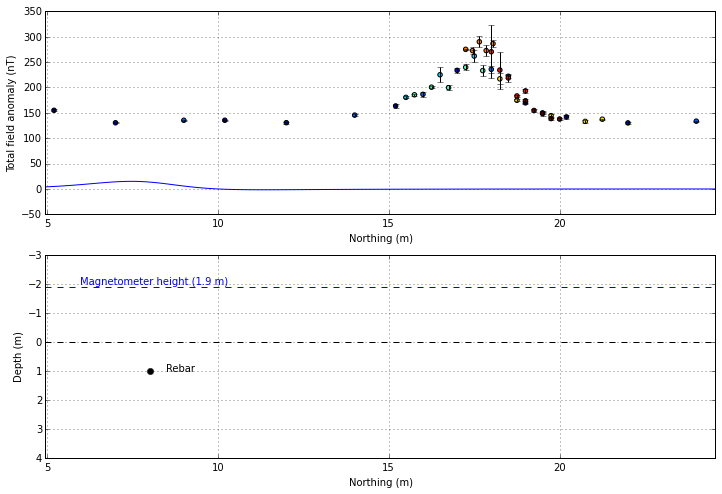

In [26]:
fig, ax = plt.subplots(2,1, figsize = (12, 8))
ax[1].plot(x0, depth, 'ko')
ax[1].text(x0+0.5, depth, 'Rebar', color='k')
ax[1].text(xlim[0]+1.,-2.0, 'Magnetometer height (1.9 m)', color='b')
ax[1].plot(xlim, np.r_[-1.9, -1.9], 'b--')

magi,magr = getField(p, xyz, 'tf', 'total')

ax[1].plot(xlim, np.r_[0., 0.], 'k--')
ax[1].set_xlim(xlim)
ax[1].set_ylim(-3, 4)

ax[0].scatter(loc,tfa,c=teams)
ax[0].errorbar(loc,tfa,yerr=std,linestyle = "None",color="k")
ax[0].set_xlim(xlim)
ax[0].grid(which="both")

ax[0].plot(xpl, magi+magr, 'k')
ax[0].plot(xpl, magi, 'b')
ax[0].plot(xpl, magr, 'r')
# ax[1].plot(loc-8, magnT[::-1], )

ax[1].set_xlabel("Northing (m)")
ax[1].set_ylabel("Depth (m)")

ax[0].set_ylabel("Total field anomaly (nT)")

for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel("Northing (m)")
ax[1].invert_yaxis()    
plt.show()